In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import callbacks
from PIL import Image
import matplotlib.pyplot as plt
import modules.images.utils as utils
import os

In [3]:
directory = "./data/cifar-100-test/train"
categories = utils.get_categories(directory)

In [4]:
# Model configuration
TRAIN_DATA_DIR = 'data/cifar-100-test/train'
TEST_DATA_DIR = 'data/cifar-100-test/test'
TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 25
batch_size = 25
img_width, img_height, img_num_channels = 32, 32, 3
no_classes = 2
no_epochs = 25
validation_split = 0.3
verbosity = 1

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [5]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split)

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training')
 
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


# Model 1: une seul couche

In [6]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

# Compile the model
model = utils.compile_model(model)

# training = model.fit_generator(train_generator, epochs=25, validation_data=validation_generator)
training = utils.train_model(model, no_epochs, train_generator, validation_generator)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 65538     
Total params: 67,970
Trainable params: 67,970
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
28/28 [==============================] - 4s 141ms/step - loss: 16.9749 - accuracy: 0.7000 - val_loss: 2.9519 - val_accuracy: 0.7600
Epoch 2/25
28/28 [==============================] - 3s 90ms/step - loss: 1.0995 - accuracy: 0.7800 - val_loss: 1.3424 - val_accuracy: 0.7133
Epoch 3/25
28/28 [==============================] - 3s 90ms/step - loss: 0.3126 - accuracy: 0.8686 - val_loss: 1.0300 - val_accuracy: 0.7867
Epoch 4/25
28/28 [==============================] - 2s 73ms/step - loss: 0.1781 - accuracy: 0.9271 - val_loss: 1.1421 - val_accuracy: 0.8167
Epoch 5/25
28/28 [==============================] - 2s 79ms/step - loss: 0.1200 - accuracy: 0.9443 - val_loss: 1.0836 - val_accuracy: 0.7900
Epoch 6/25
28/28 [==============================] - 2s 77ms/step - loss: 0.0998 - accuracy: 0.9514 - val_loss: 1.3741 - val_accuracy: 0.8100
Epoch 7/25
28/28 [==============================] - 2s 72ms/step - loss: 0.0

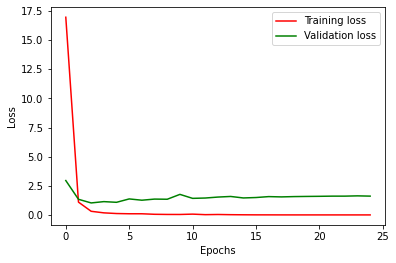

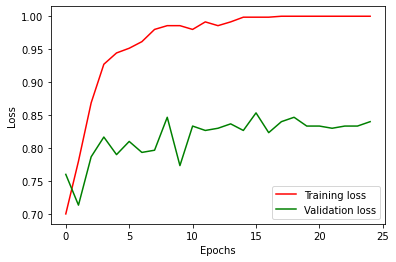

# Model 2: essai avec une deuxieme couche conv

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 131074    
Total params: 184,770
Trainable params: 184,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
28/28 [==============================] - 10s 371ms/step - loss: 33.1538 - accuracy: 0.5871 - val_loss: 0.8160 - val_accuracy: 0.6167
Epoch 2/25
28/28 [==============================] - 10s 354ms/step - loss: 0.6848 - accuracy: 0.6314 -

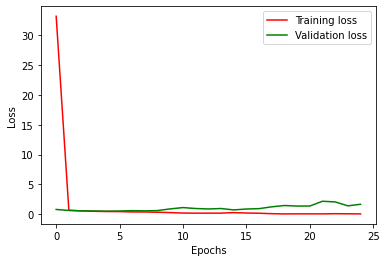

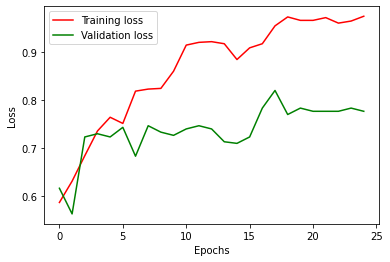

In [14]:
# Create the model
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=5, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model2.add(Conv2D(64, kernel_size=5, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

model2.summary()

model2 = utils.compile_model(model2)

training = utils.train_model(model2, no_epochs, train_generator, validation_generator)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])


# Changement de valeurs de kernel

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 131074    
Total params: 150,466
Trainable params: 150,466
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
28/28 [==============================] - 6s 225ms/step - loss: 107.6163 - accuracy: 0.5929 - val_loss: 0.6185 - val_accuracy: 0.7033
Epoch 2/25
28/28 [==============================] - 6s 217ms/step - loss: 0.5216 - accuracy: 0.7486 - 

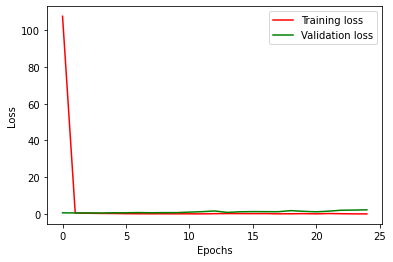

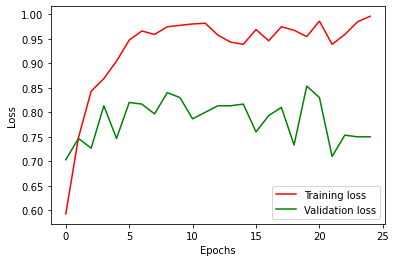

In [16]:
# Create the model
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(Flatten())
model3.add(Dense(2, activation='softmax'))

model3.summary()

model3 = utils.compile_model(model3)

training = utils.train_model(model3, no_epochs, train_generator, validation_generator)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

# Model 4: diminuer le nombre de filters

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 65538     
Total params: 70,626
Trainable params: 70,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
28/28 [==============================] - 4s 142ms/step - loss: 70.0271 - accuracy: 0.6357 - val_loss: 3.0055 - val_accuracy: 0.7367
Epoch 2/25
28/28 [==============================] - 3s 109ms/step - loss: 1.5084 - accuracy: 0.7714 - val

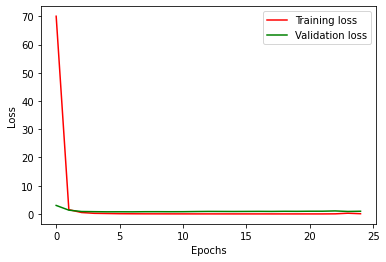

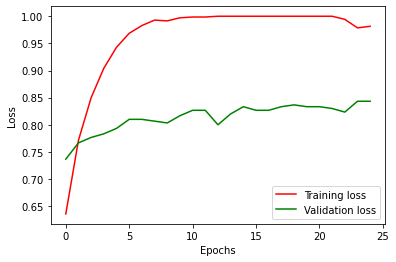

In [17]:
# Create the model
model4 = Sequential()

model4.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model4.add(Flatten())
model4.add(Dense(2, activation='softmax'))

model4.summary()

model4 = utils.compile_model(model4)

training = utils.train_model(model4, no_epochs, train_generator, validation_generator)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

# Model 5: ajout d'un drop out

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
dense_5 (Dense)              (None, 32, 32, 8)         264       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 16386     
Total params: 21,738
Trainable params: 21,738
Non-trainable params: 0
__________________________________________________

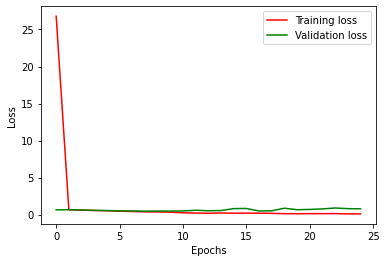

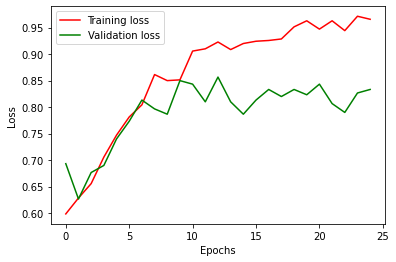

In [20]:
# Create the model
model5 = Sequential()

model5.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model5.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))

model5.add(Dense(8, activation='relu'))
model5.add(Dropout(0.2))

model5.add(Flatten())
model5.add(Dense(2, activation='softmax'))

model5.summary()

model5 = utils.compile_model(model5)

training = utils.train_model(model5, no_epochs, train_generator, validation_generator)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

# Model 6: ajout callbacks

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
dense_15 (Dense)             (None, 32, 32, 8)         264       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 16386     
Total params: 21,738
Trainable params: 21,738
Non-trainable params: 0
_________________________________________________

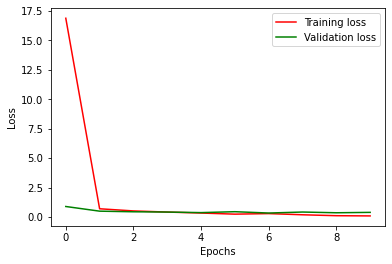

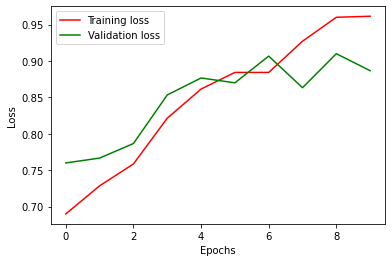

In [25]:
# Create the model
model6 = Sequential()

model6.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model6.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))

model6.add(Dense(8, activation='relu'))
model6.add(Dropout(0.2))

model6.add(Flatten())
model6.add(Dense(2, activation='softmax'))

model6.summary()

model6 = utils.compile_model(model6)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

training = utils.train_model(model6, no_epochs, train_generator, validation_generator, my_callbacks)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

# Model 7: 

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
dense_17 (Dense)             (None, 32, 32, 16)        528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
dense_18 (Dense)             (None, 32, 32, 8)         136       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)            

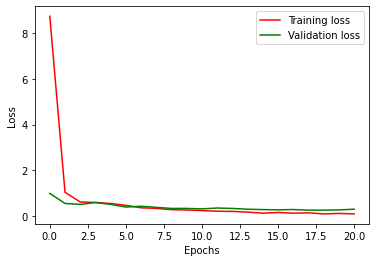

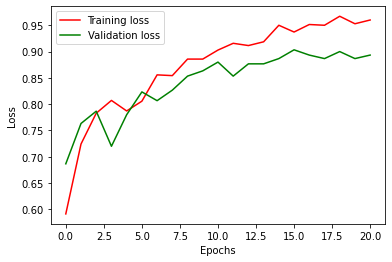

In [26]:
# Create the model
model7 = Sequential()

model7.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model7.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))

model7.add(Dense(16, activation='relu'))
model7.add(Dropout(0.4))

model7.add(Dense(8, activation='relu'))
model7.add(Dropout(0.2))

model7.add(Flatten())
model7.add(Dense(2, activation='softmax'))

model7.summary()

model7 = utils.compile_model(model7)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

training = utils.train_model(model7, no_epochs, train_generator, validation_generator, my_callbacks)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

# Model 8: augmentation du drop out

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
dense_42 (Dense)             (None, 32, 32, 16)        528       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
dense_43 (Dense)             (None, 32, 32, 8)         136       
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 8192)            

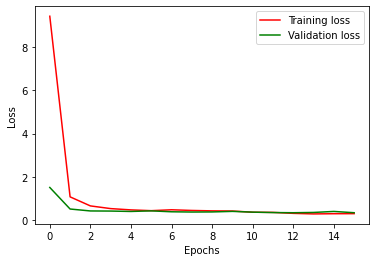

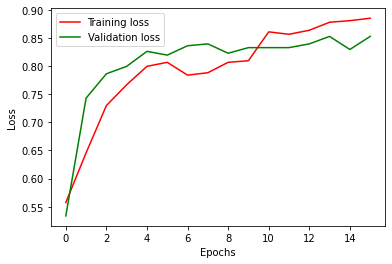

In [57]:
# Create the model
model8 = Sequential()

model8.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model8.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))

model8.add(Dense(16, activation='relu'))
model8.add(Dropout(0.4))

model8.add(Dense(8, activation='relu'))
model8.add(Dropout(0.4))

model8.add(Flatten())
model8.add(Dense(2, activation='softmax'))

model8.summary()

model8 = utils.compile_model(model8)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

training = utils.train_model(model8, no_epochs + 10, train_generator, validation_generator, my_callbacks)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

In [28]:
from keras.models import Model
from keras.preprocessing import image
import numpy as np


def init_activation(model, test_img):
    layer_outputs = [layer.output for layer in model.layers]
    img = image.load_img(test_img, target_size=(32,32, 3))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    return activation_model.predict(img_arr)


def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

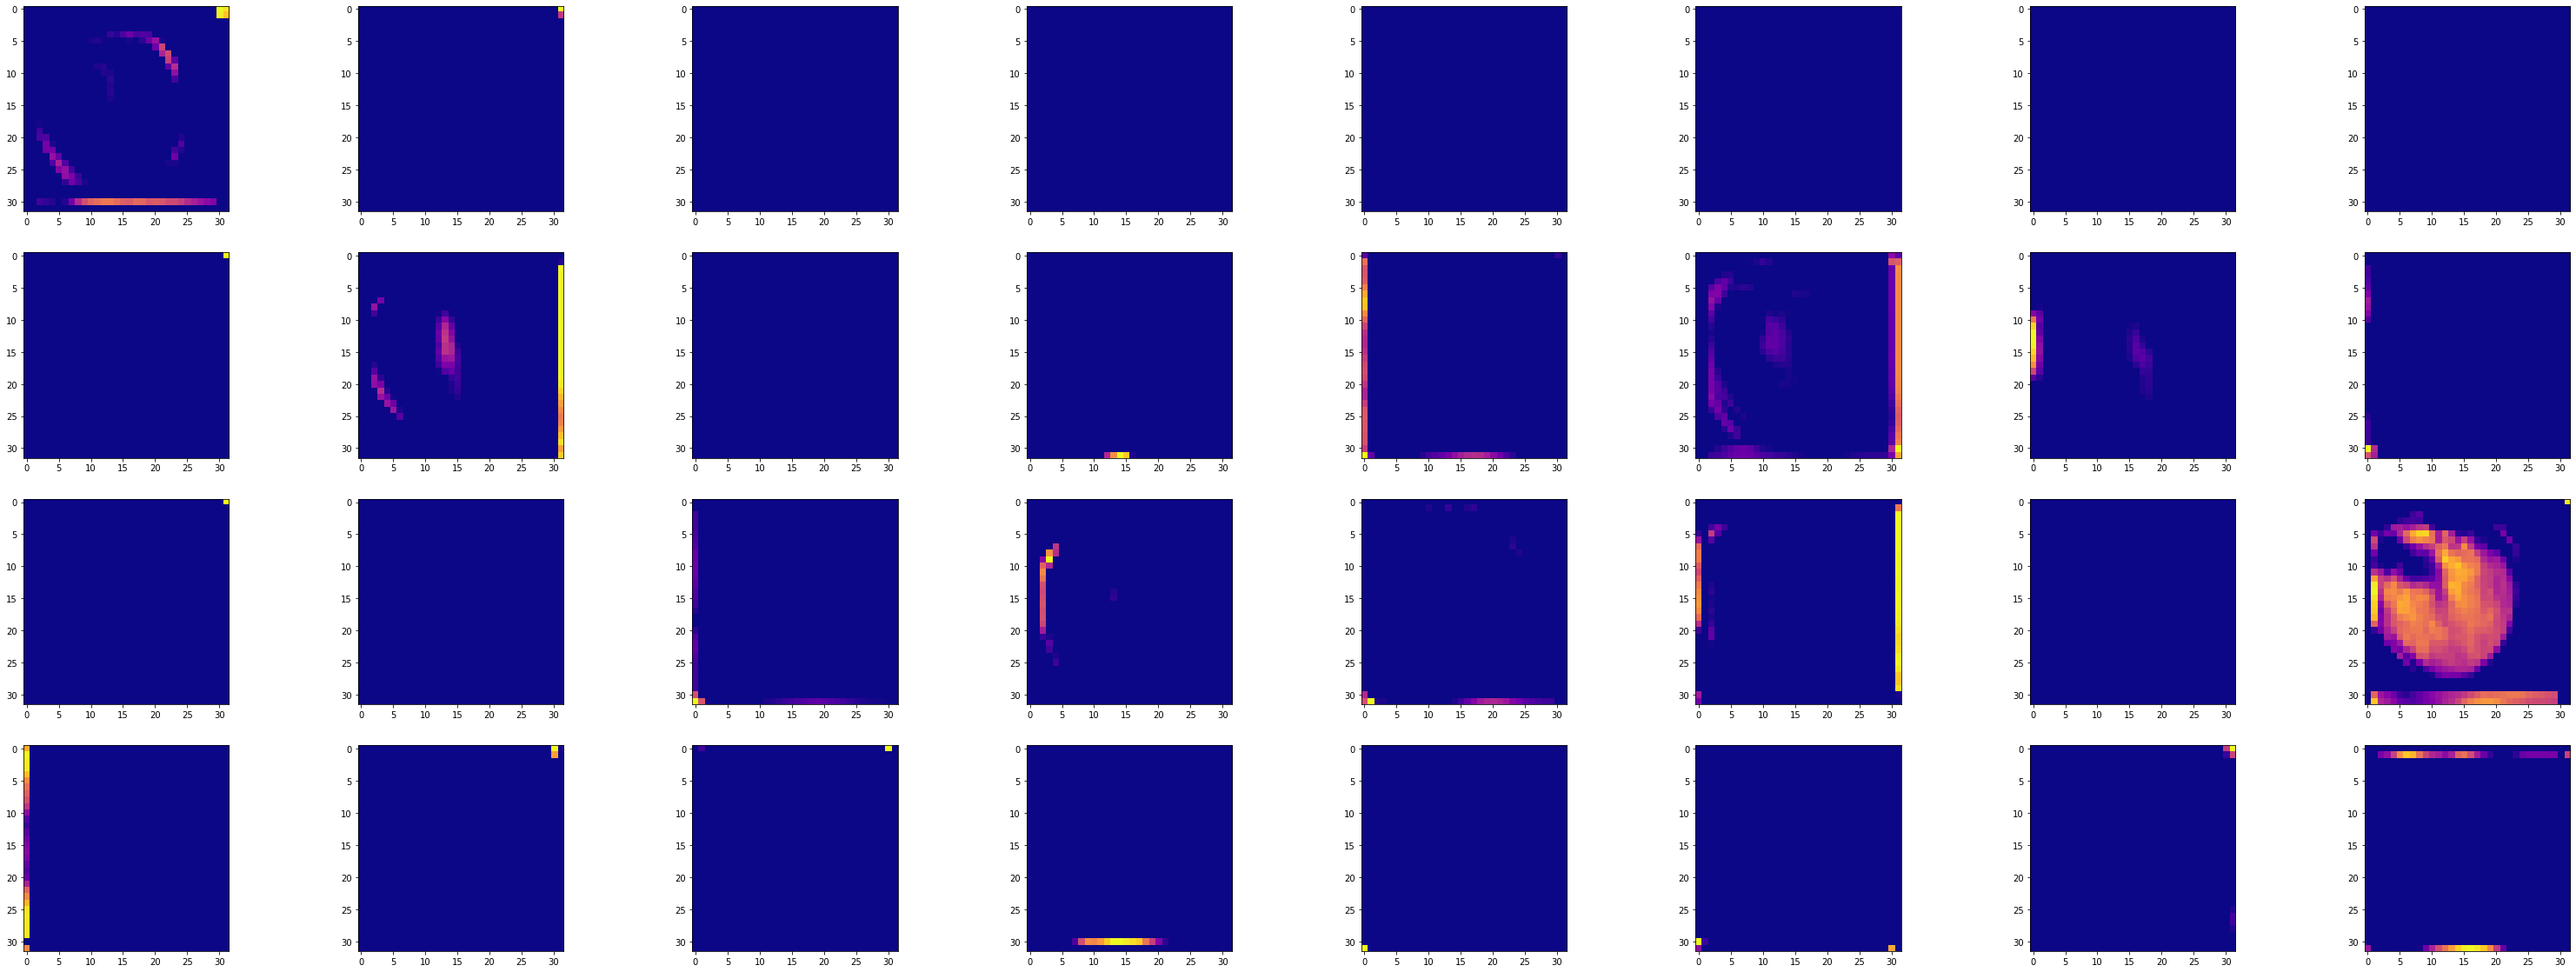

In [29]:
test_image = "data/cifar-100-test/test/apple/0014.png"
activations = init_activation(model, test_image)
display_activation(activations, 8, 4, 0)

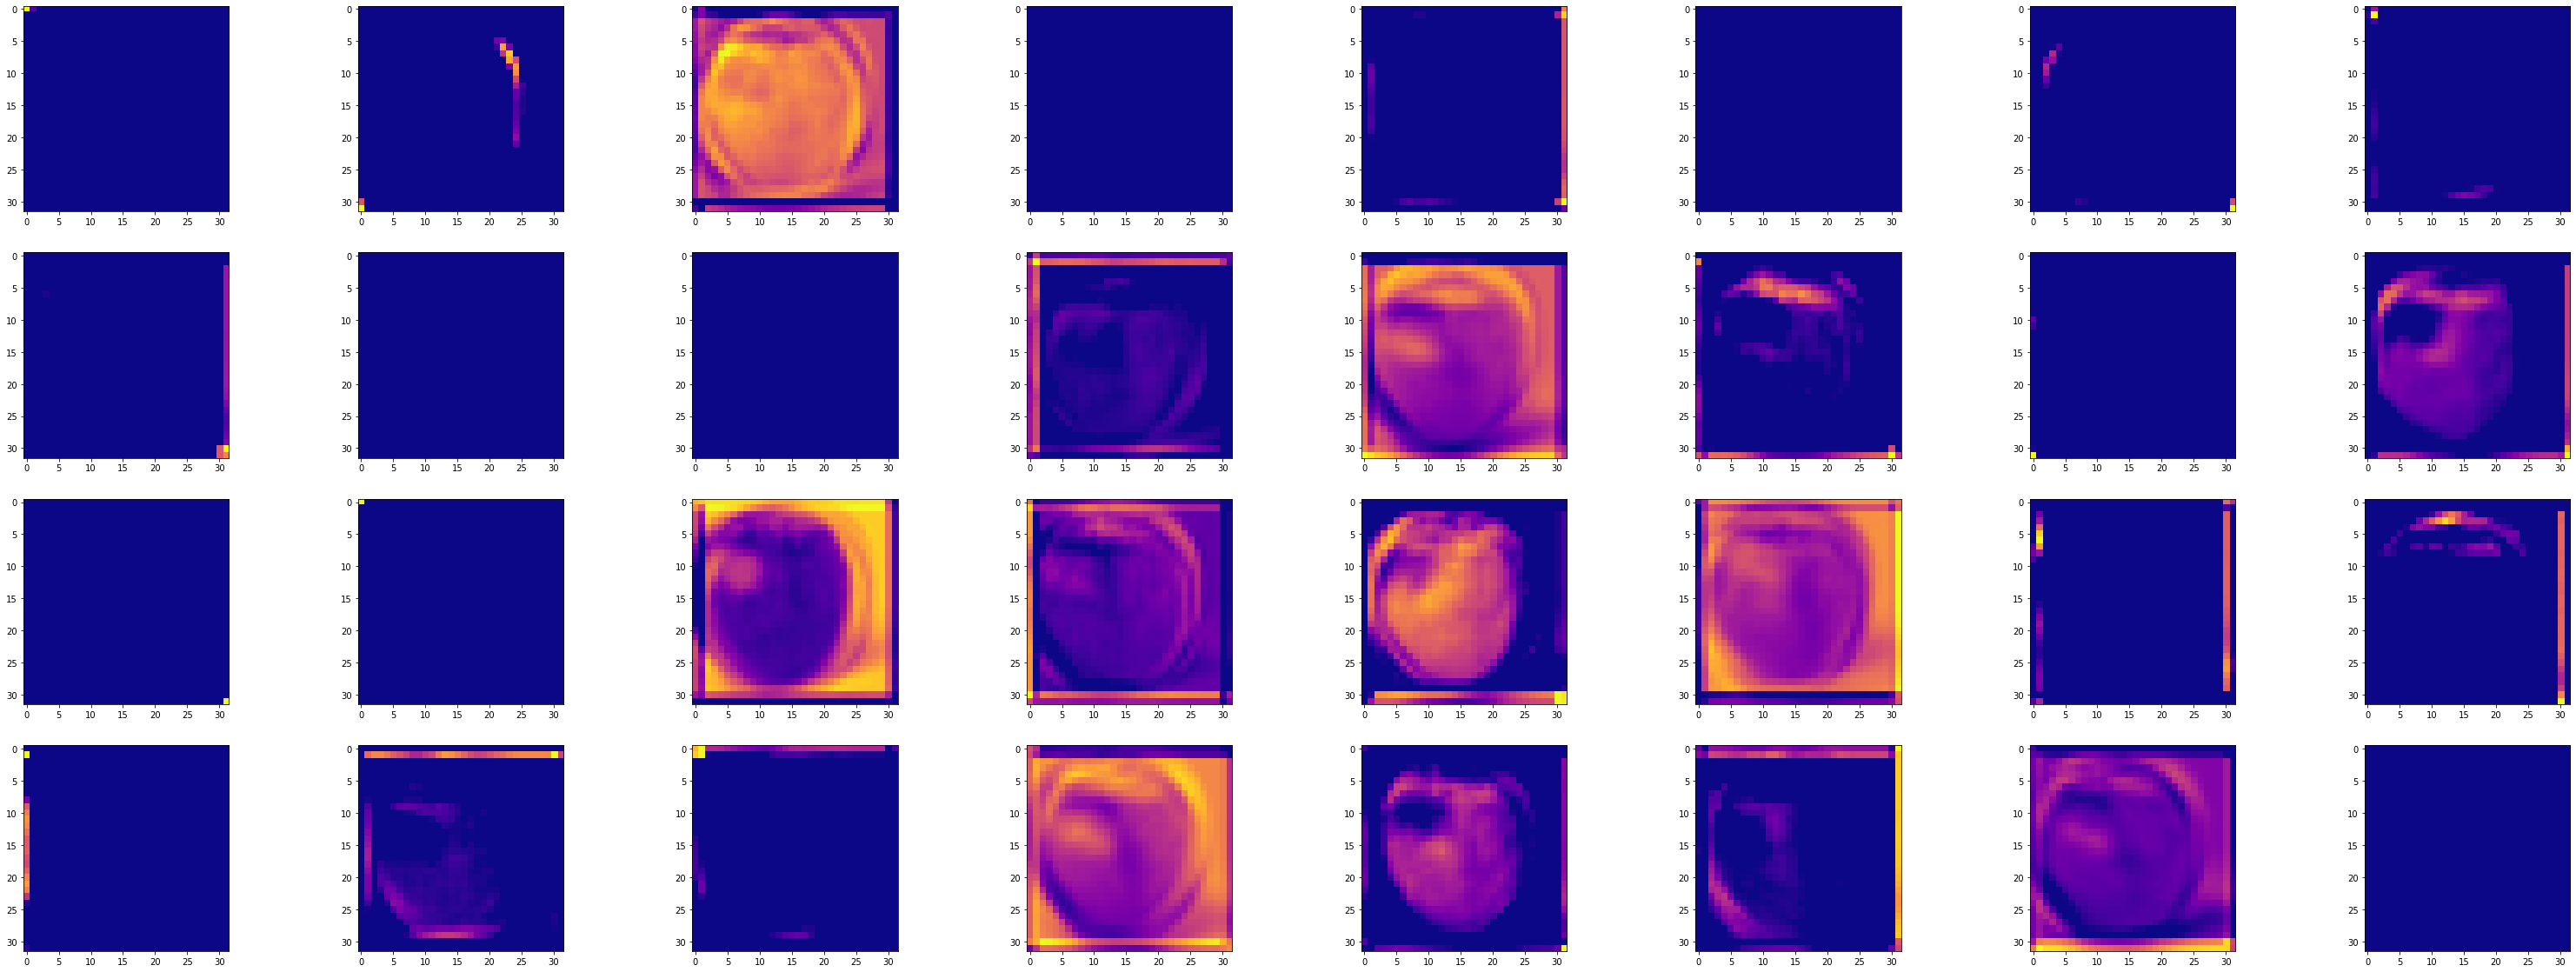

In [30]:
activations = init_activation(model2, test_image)
display_activation(activations, 8, 4, 0)

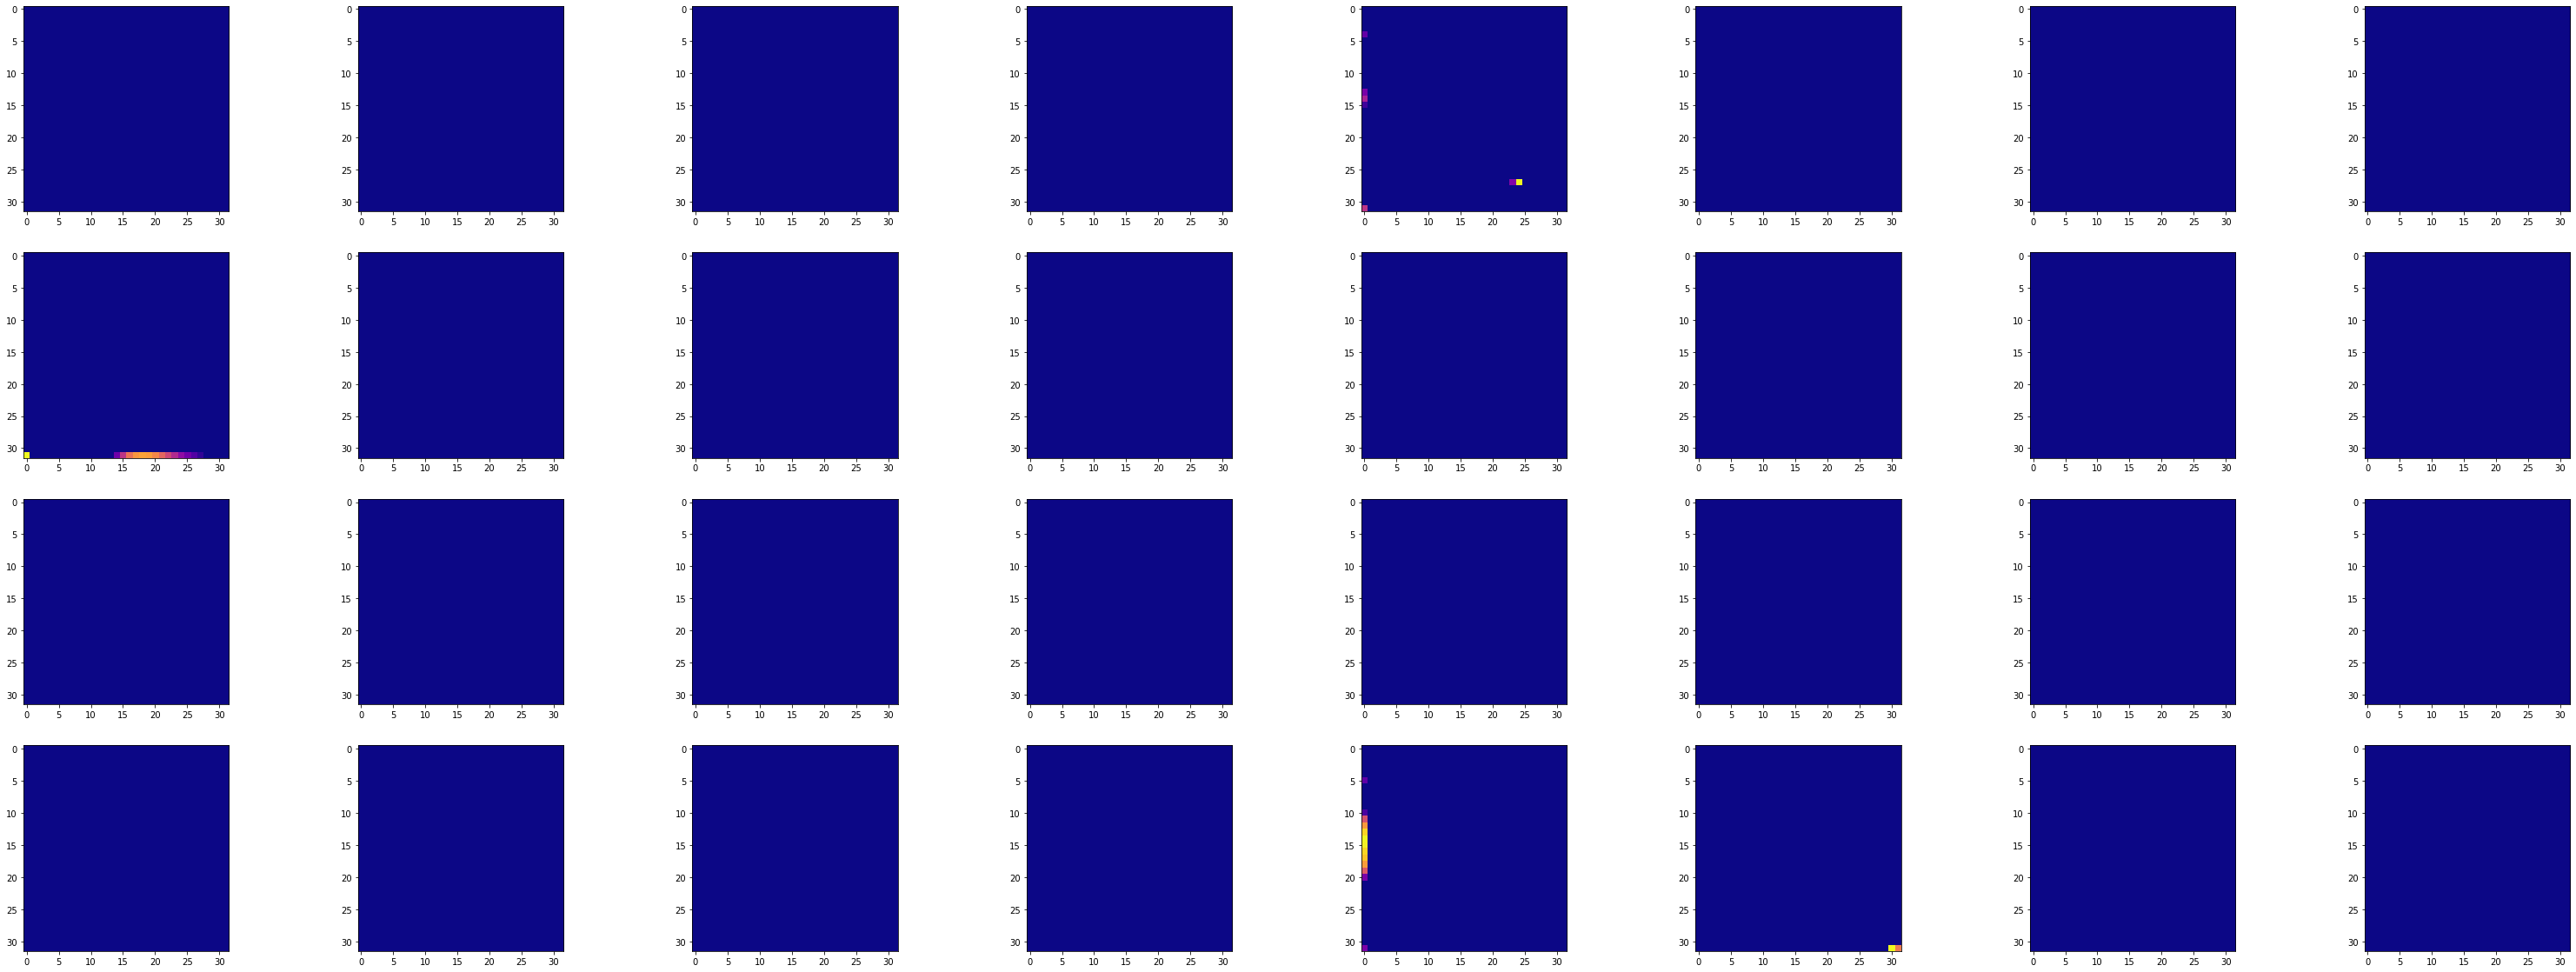

In [34]:
activations = init_activation(model2, test_image)
display_activation(activations, 8, 4, 1)

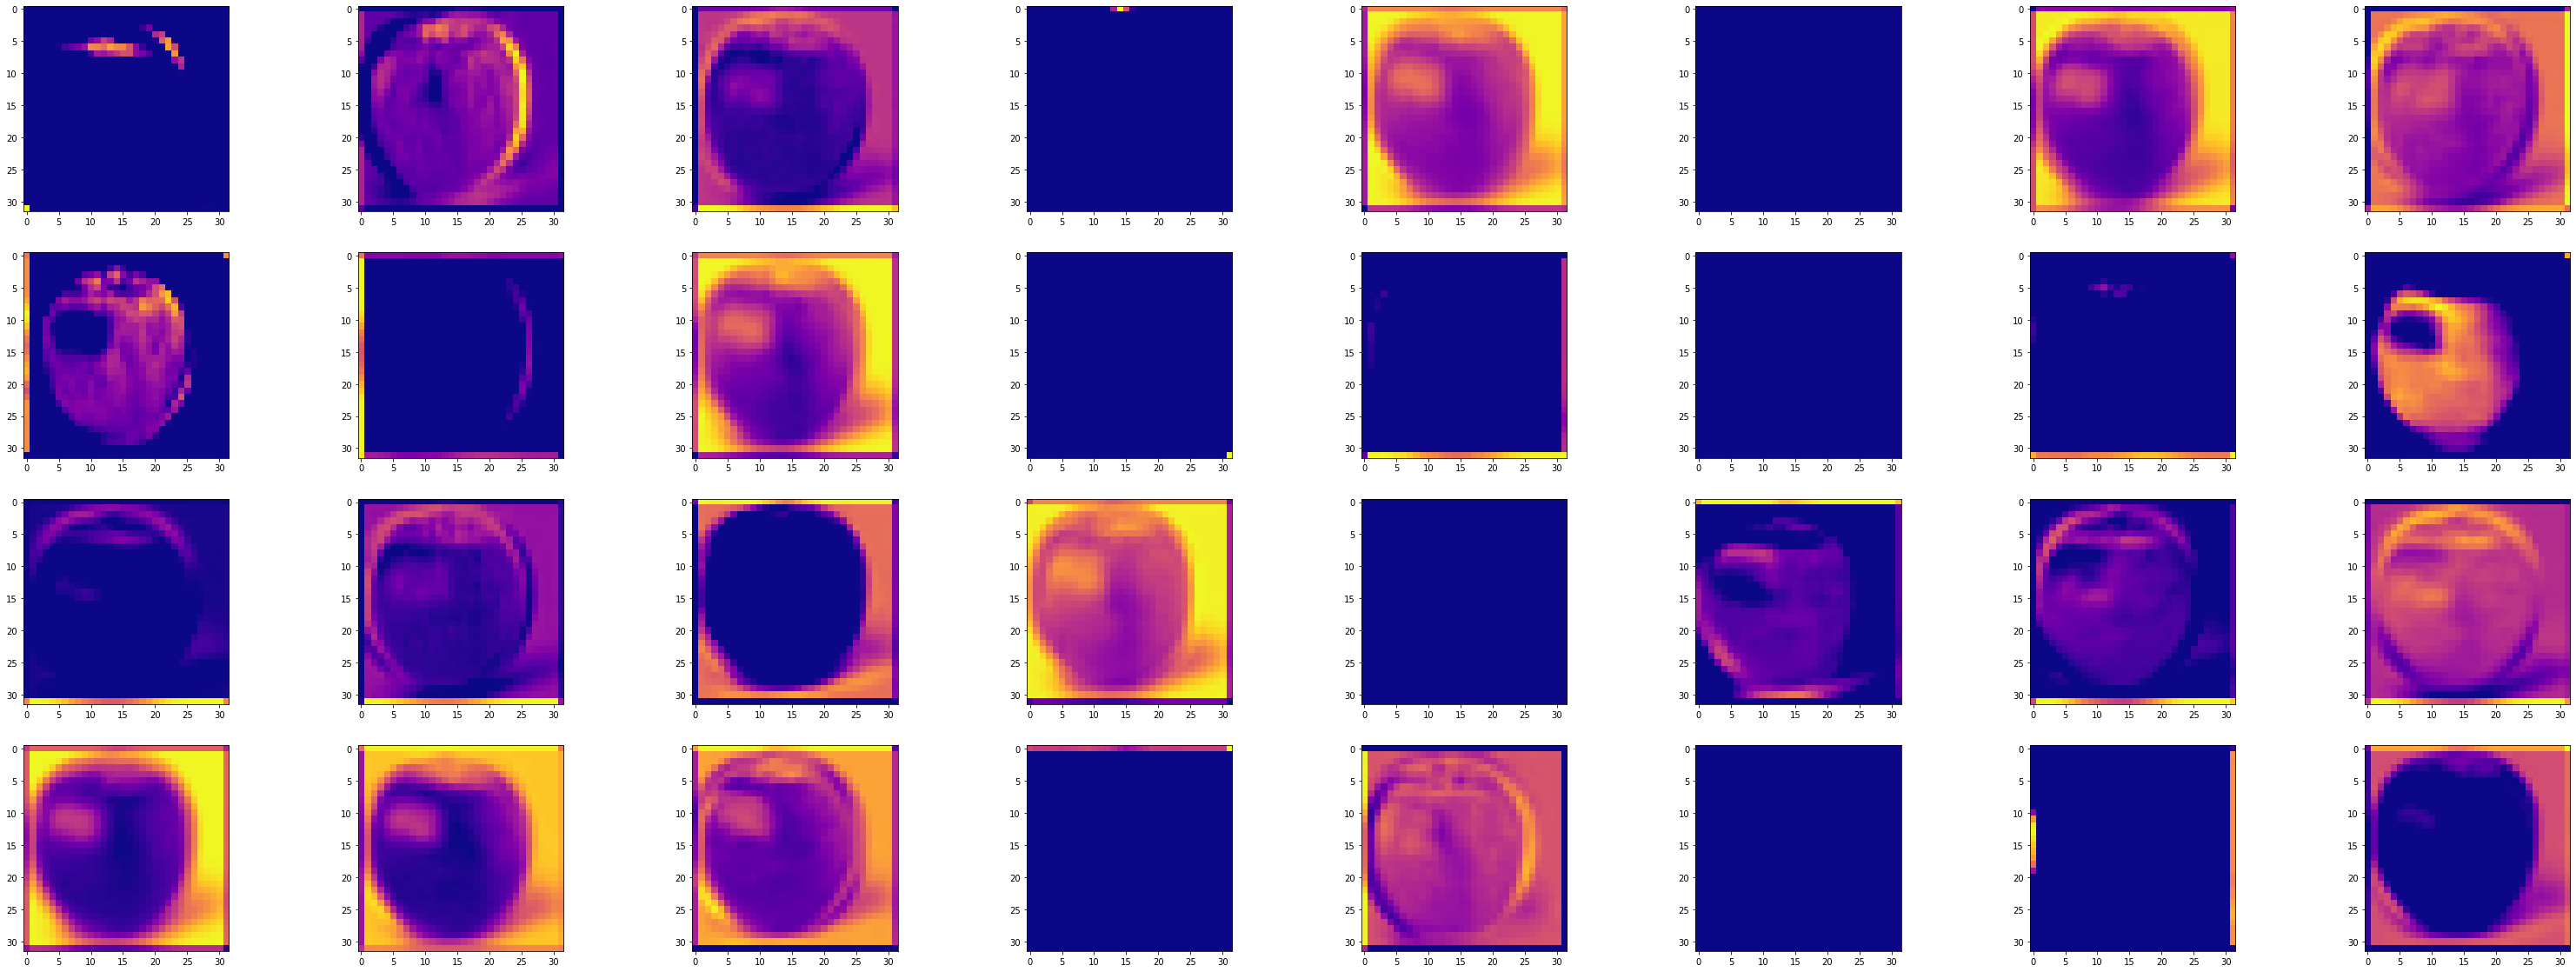

In [35]:
activations = init_activation(model3, test_image)
display_activation(activations, 8, 4, 0)

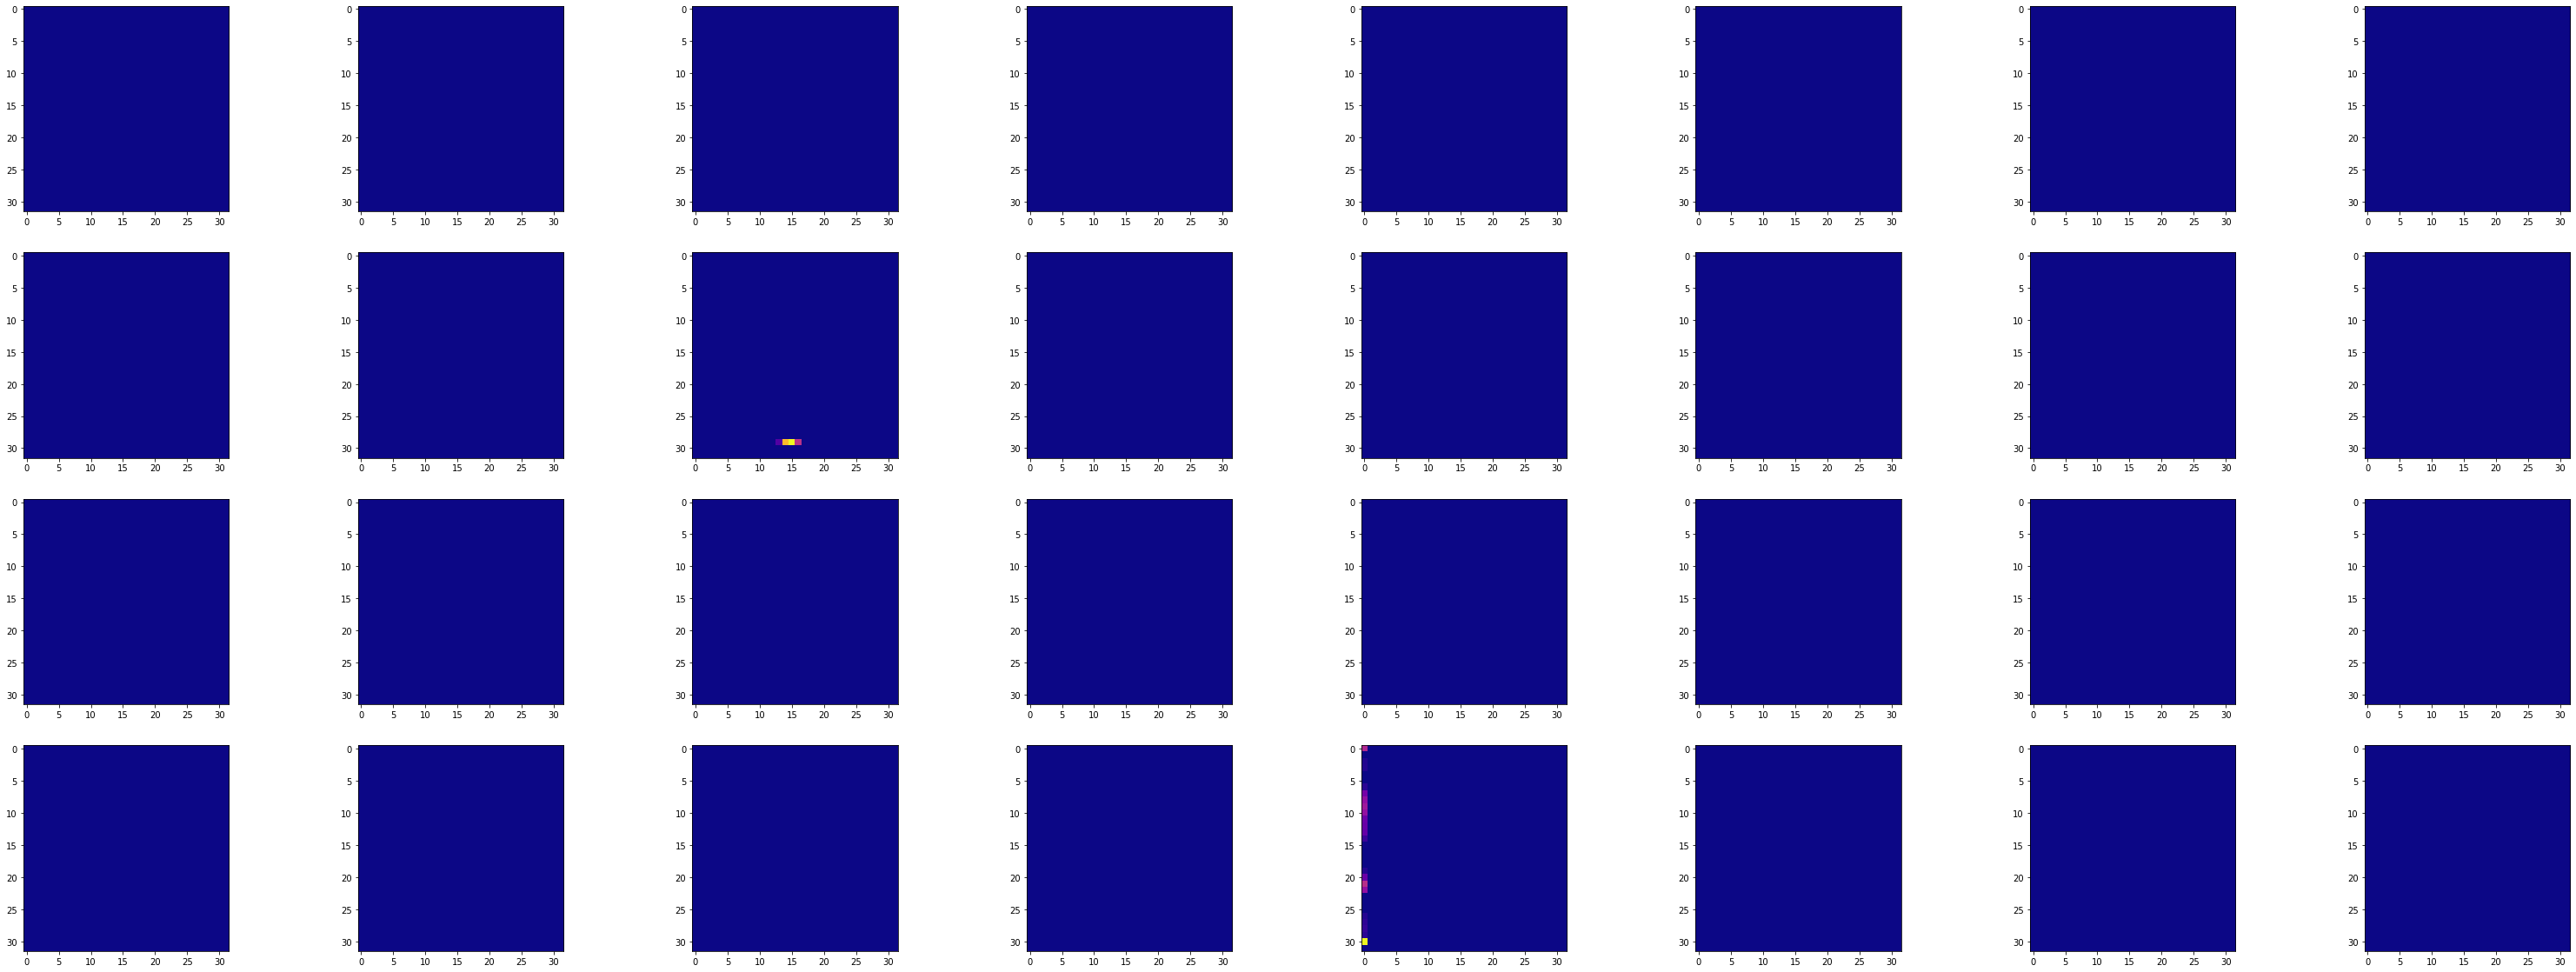

In [36]:
activations = init_activation(model3, test_image)
display_activation(activations, 8, 4, 1)

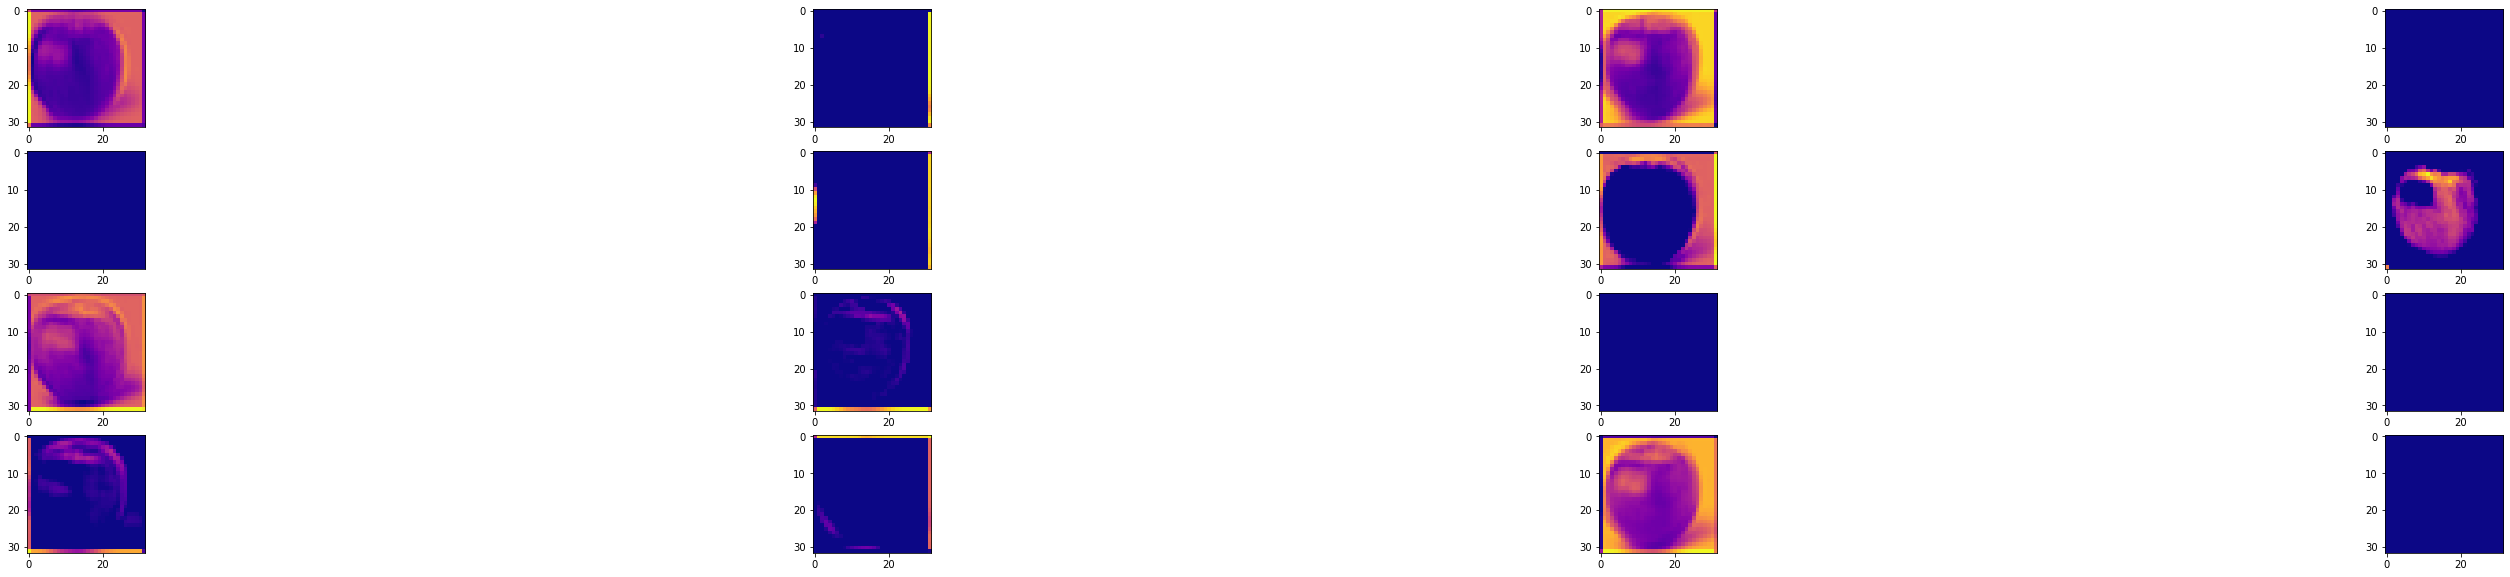

In [48]:
activations = init_activation(model4, test_image)
display_activation(activations, 4, 4, 0)

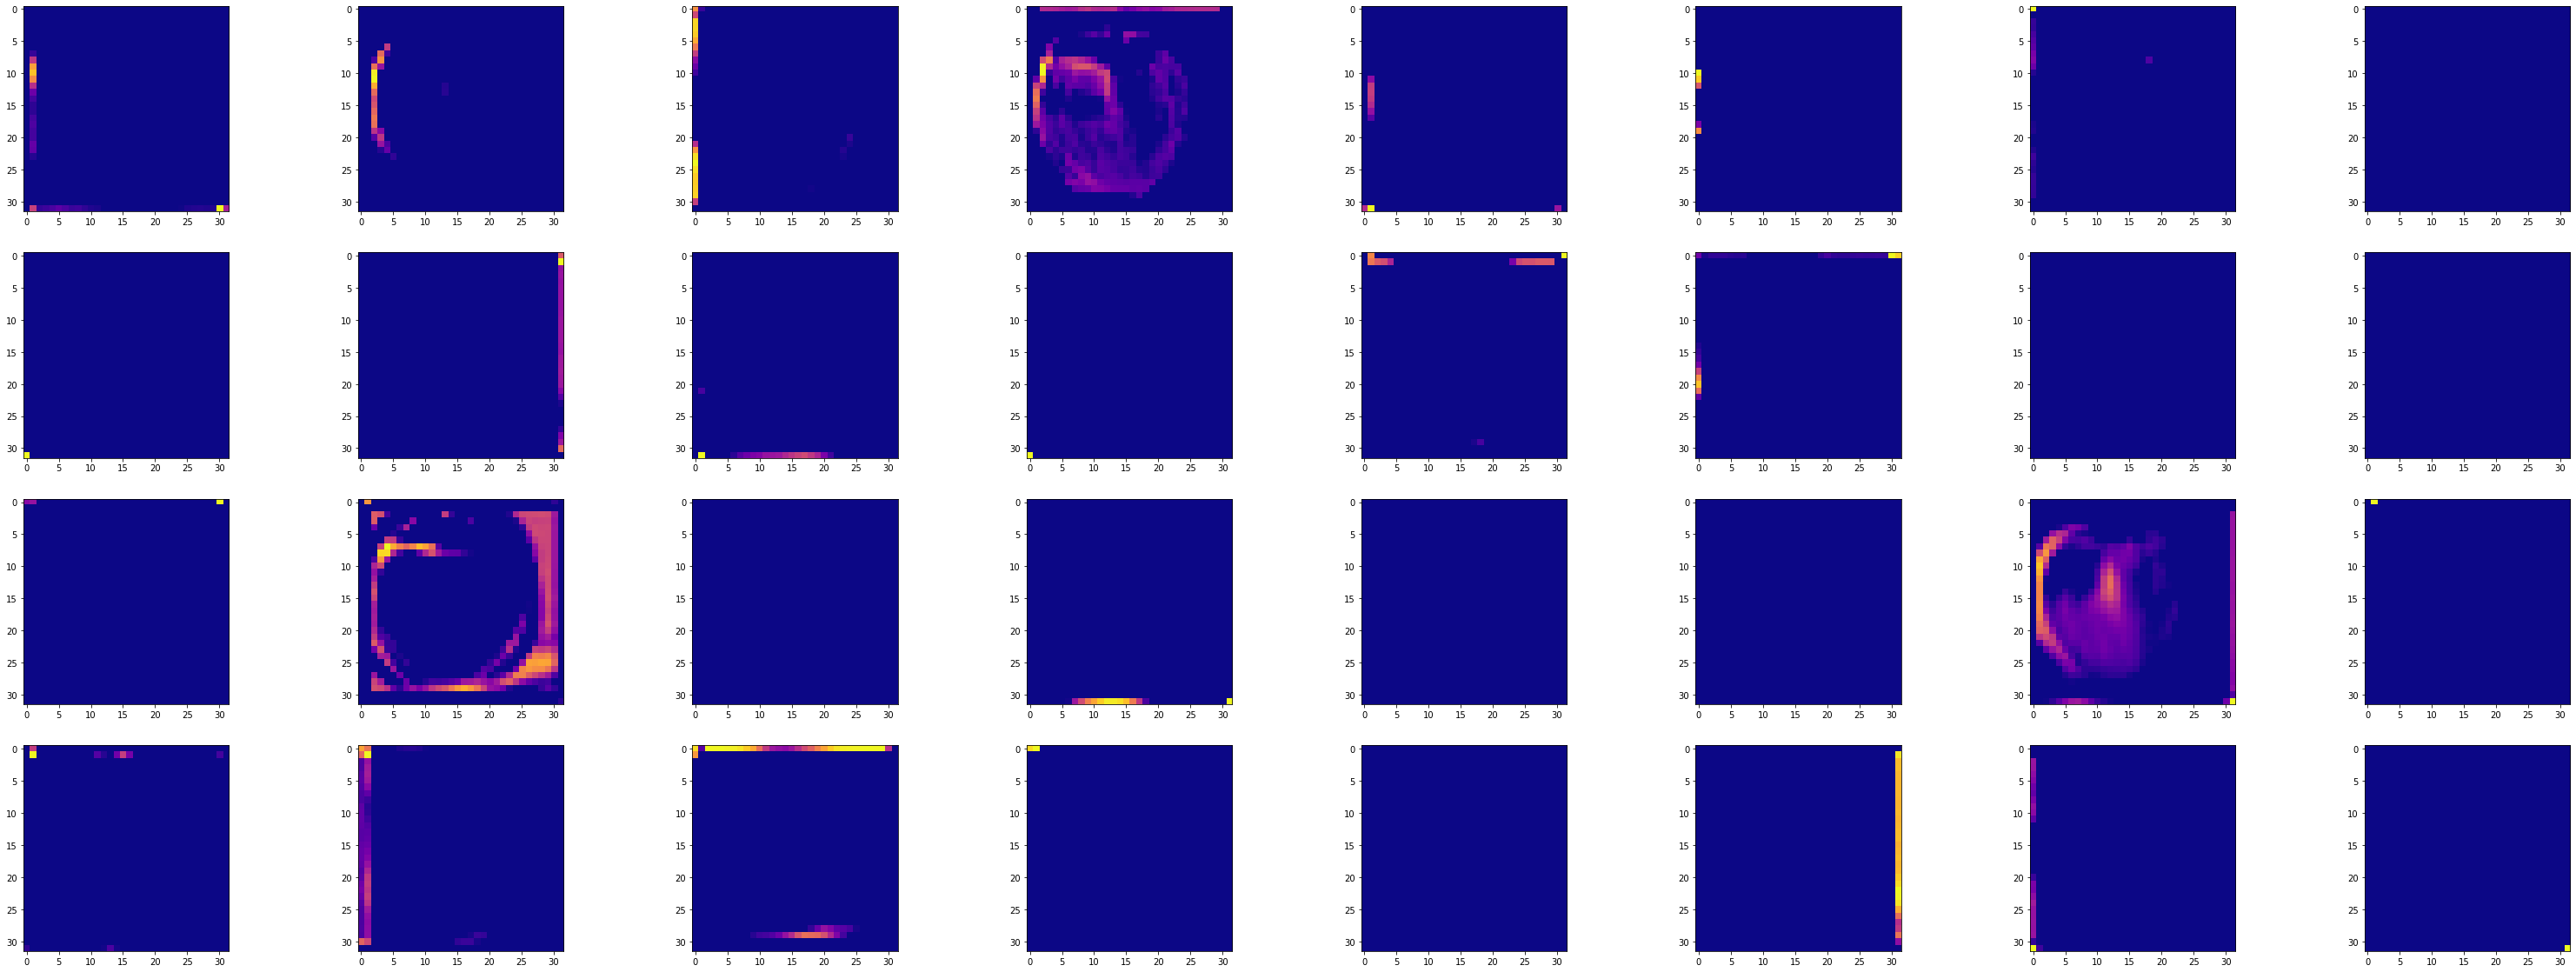

In [49]:
activations = init_activation(model4, test_image)
display_activation(activations, 8, 4, 1)

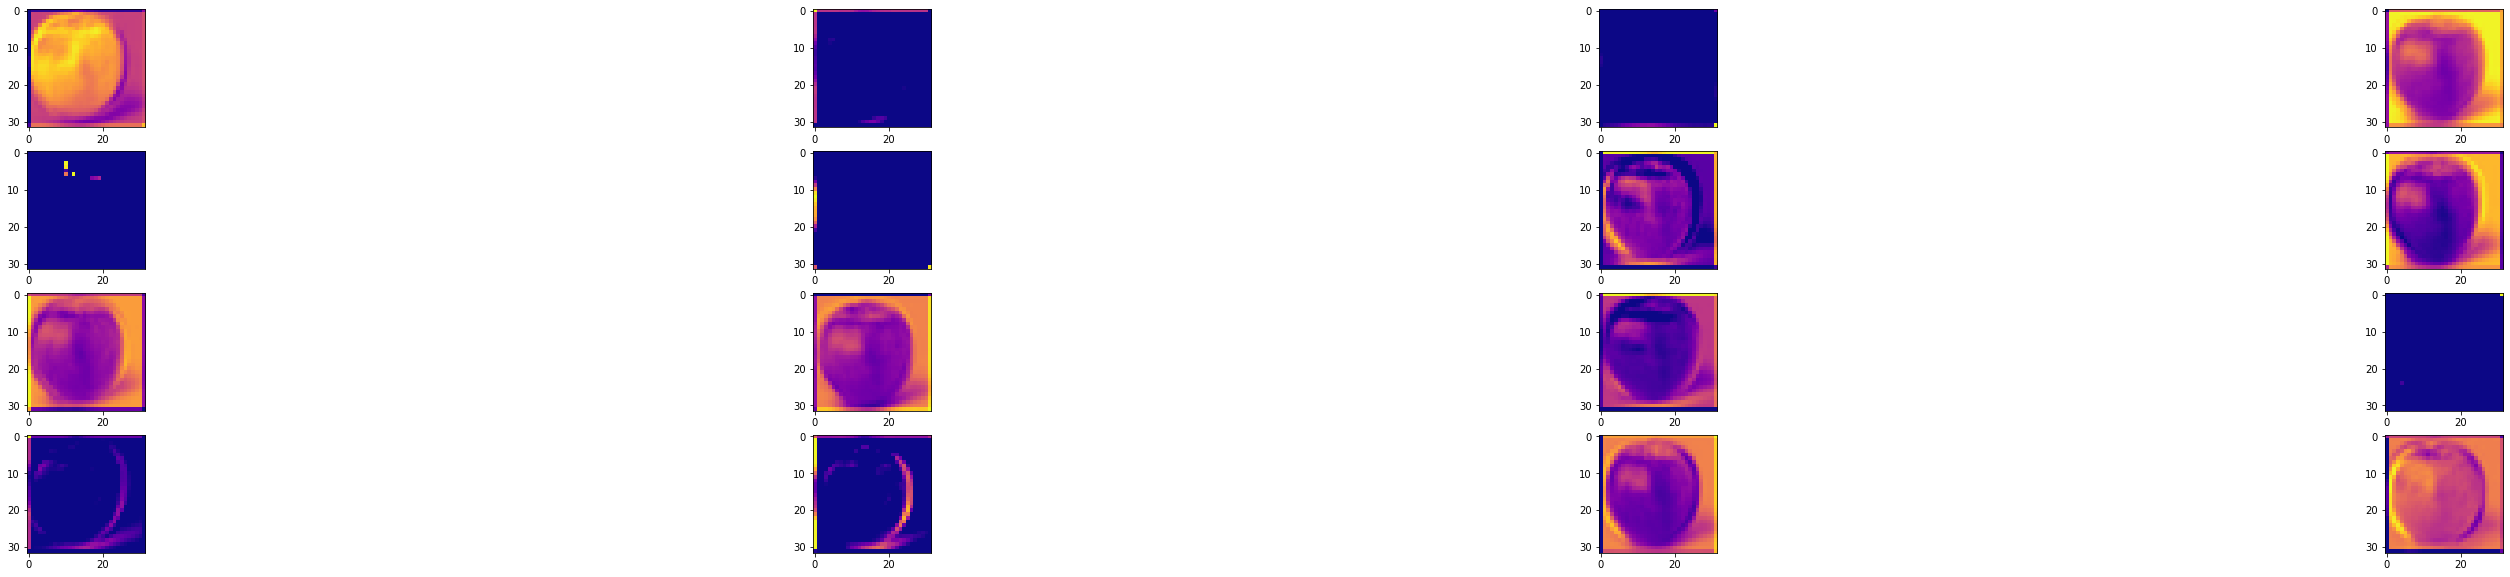

In [50]:
activations = init_activation(model5, test_image)
display_activation(activations, 4, 4, 0)

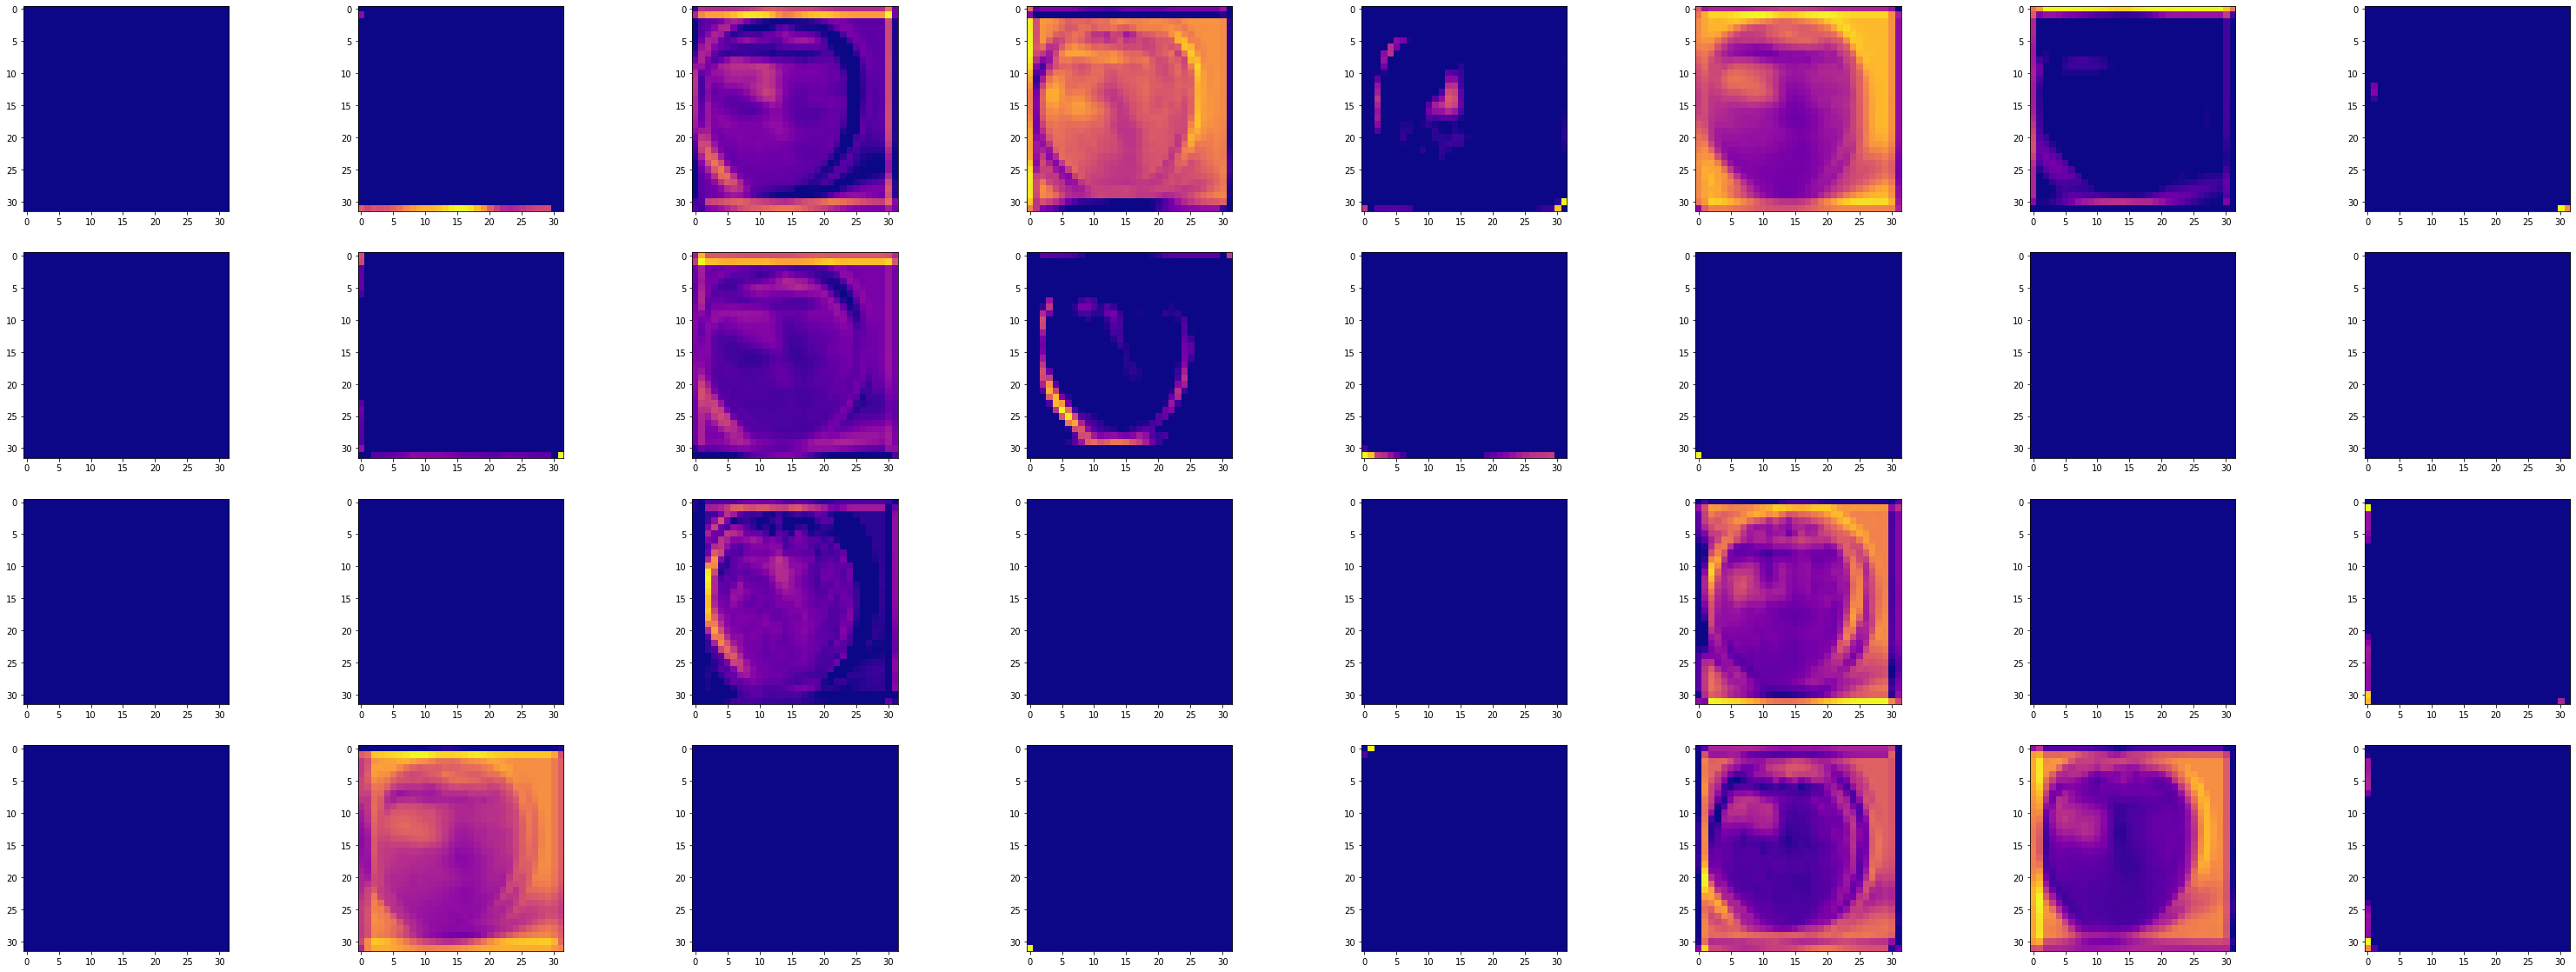

In [51]:
activations = init_activation(model5, test_image)
display_activation(activations, 8, 4, 1)

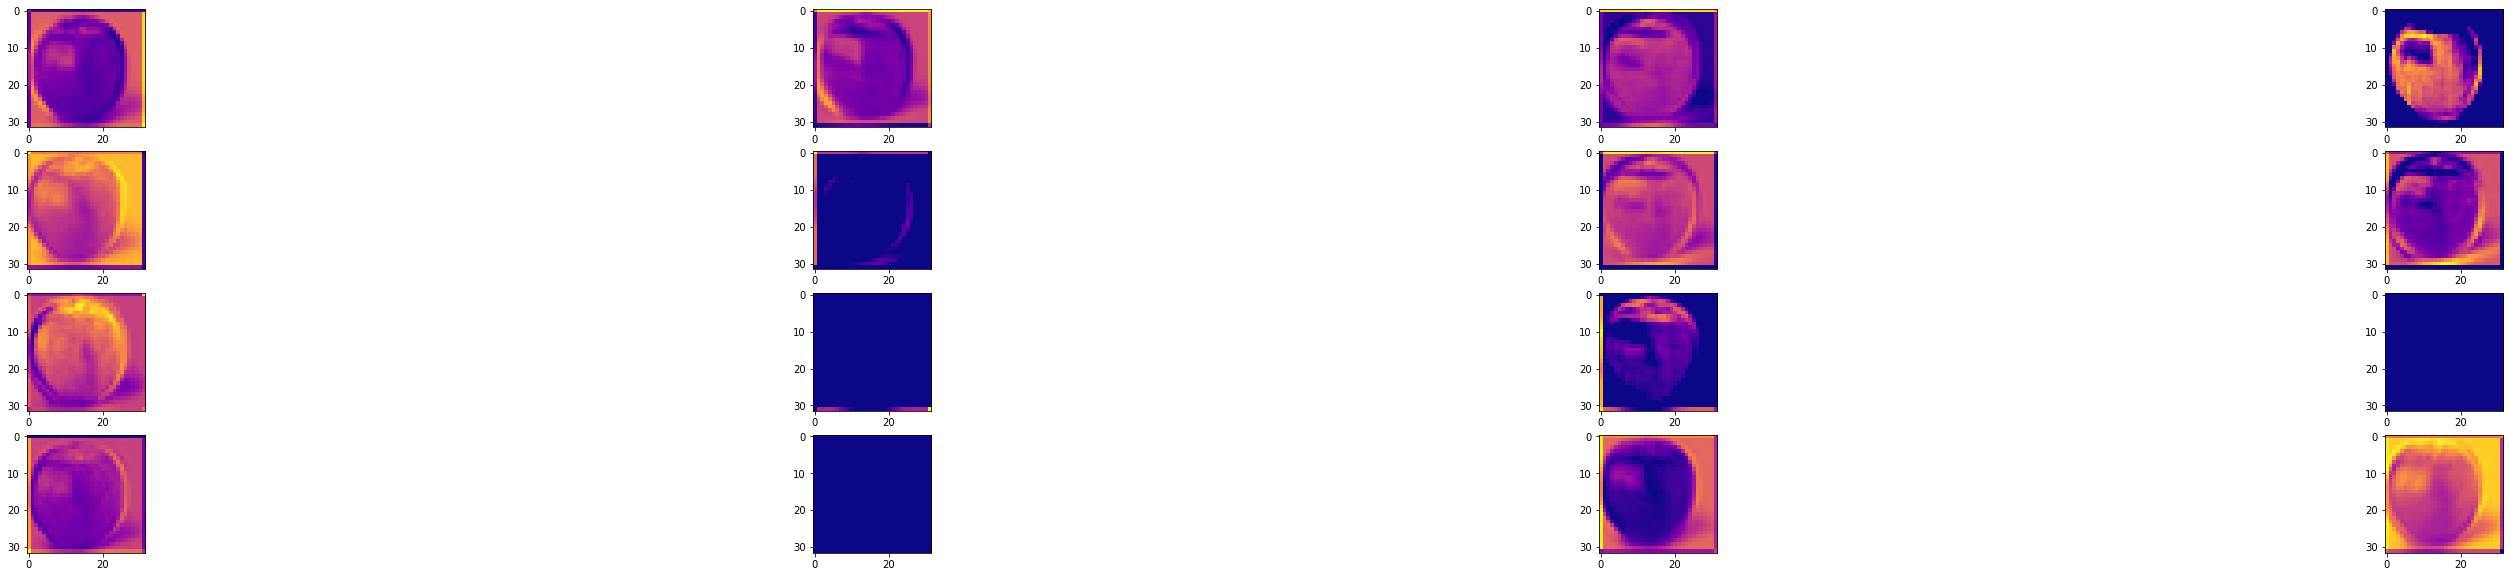

In [58]:
activations = init_activation(model8, test_image)
display_activation(activations, 4, 4, 0)

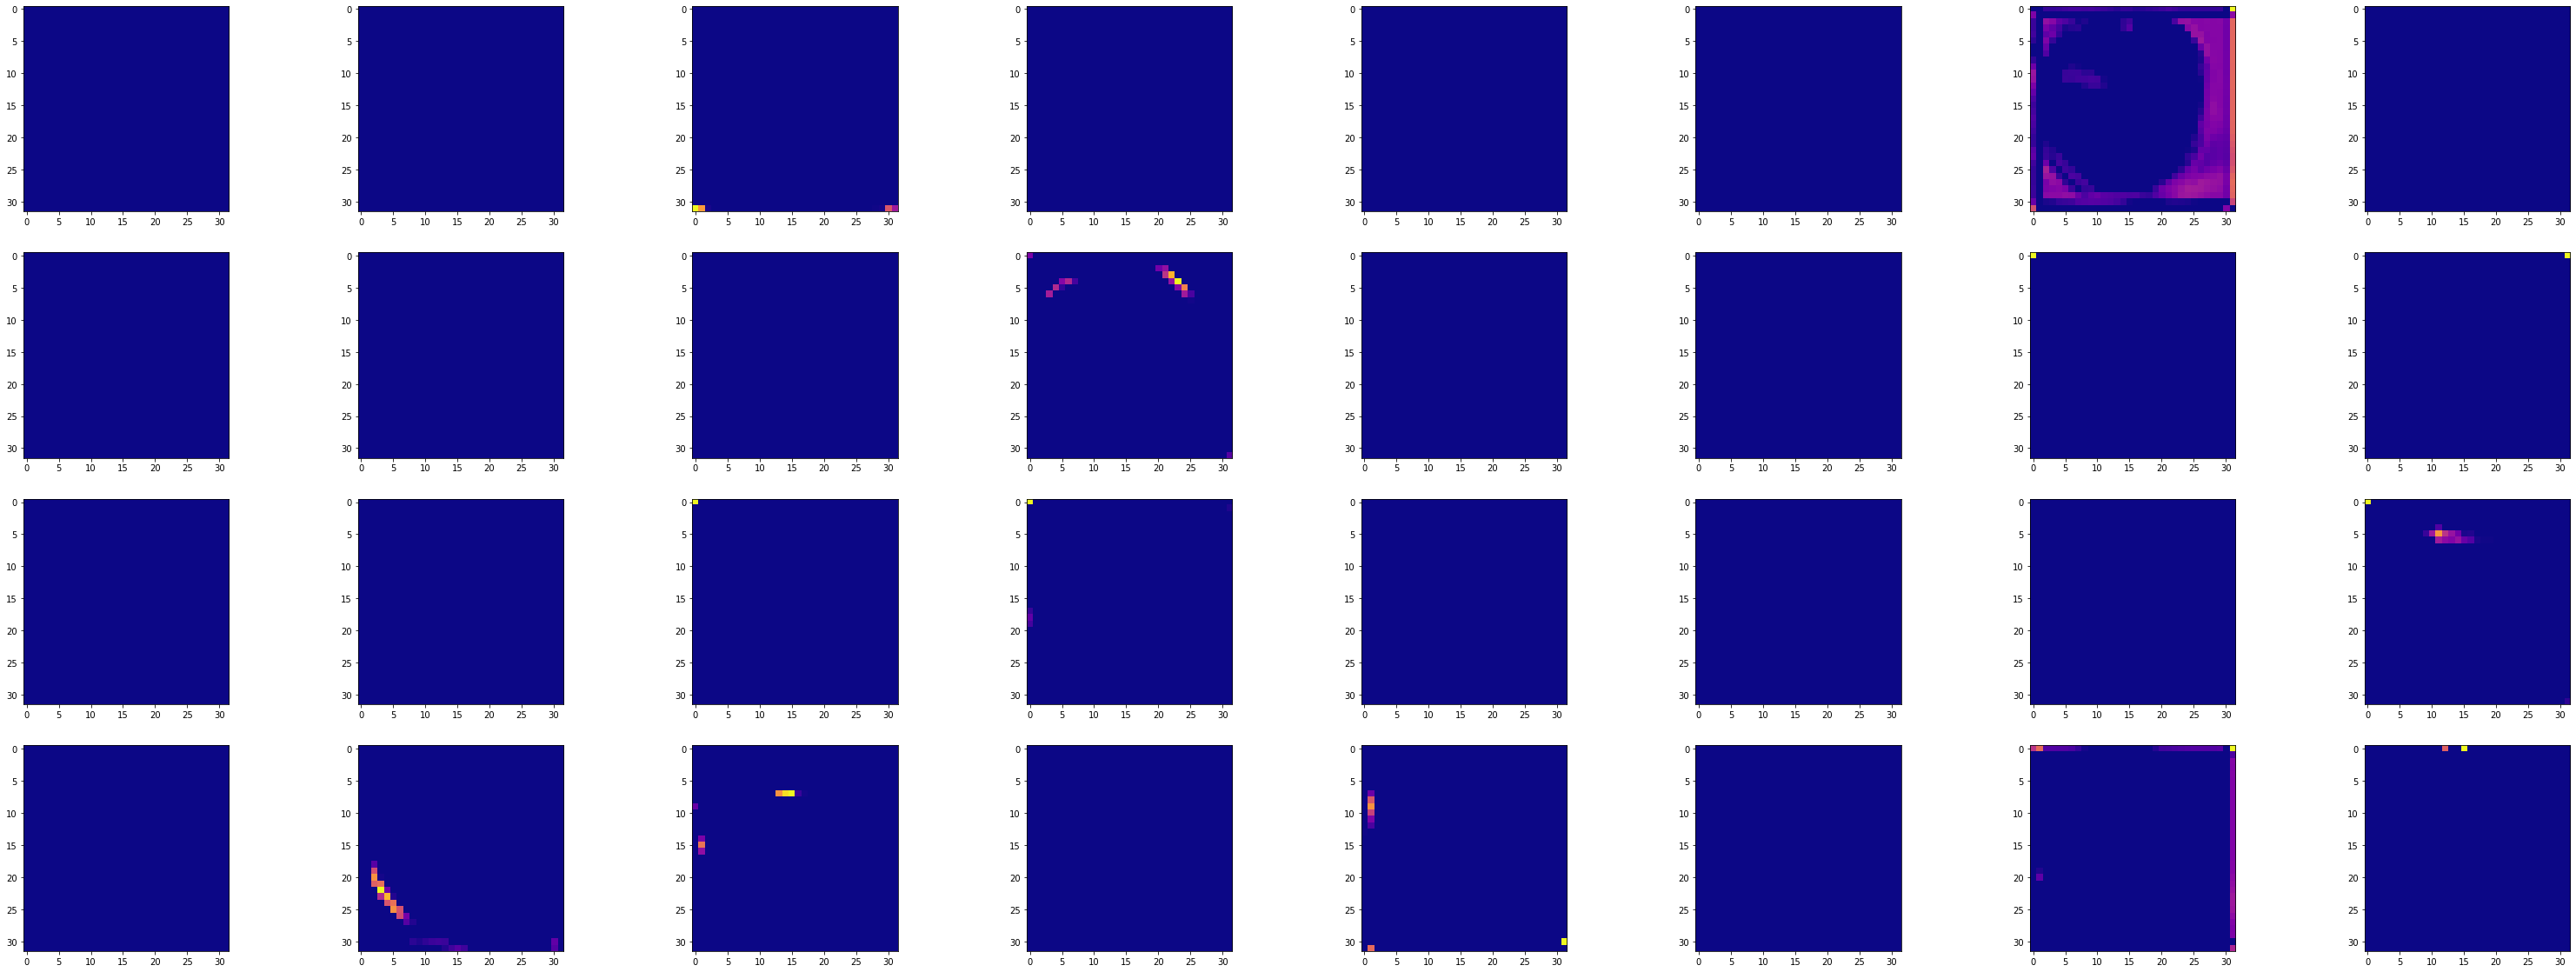

In [59]:
activations = init_activation(model8, test_image)
display_activation(activations, 8, 4, 1)

# Test du model

## fonction de prediction

In [190]:
from keras.preprocessing import image
from keras.models import load_model
import pandas as pd
import seaborn as sns
import cv2 as cv


def predict_image(model, choix):
    test_image = image.load_img(choix, target_size = (32, 32))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)

    preds = model.predict_classes(test_image)
    prob = model.predict_proba(test_image)

    index = preds[0]
    print(f'Categorie {categories[preds[0]]}, Prédiction {"%.2f" % (prob[0][index] * 100)}%')
    
    predictrions_array = []
    
    for x in range(0,2):
        predictrions_array.append([categories[x], prob[0][x]])
    
    df = pd.DataFrame(predictrions_array, columns = ['Category', 'Prediction'])

    f, axarr = plt.subplots(1,2, figsize=(10,4))

    img = cv.imread(choix)
    axarr[0].imshow(img)
    axarr[0].axis('off')

    axarr[1] = sns.barplot(x="Prediction", y="Category", data=df)
    sns.set_style(style='white')

    axarr[1].set_ylabel('Category')    
    axarr[1].set_xlabel('Prediction')

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    f.suptitle("Model Prediction")
    f.subplots_adjust(top=0.88)

    return df
    
    

Categorie apple, Prédiction 99.25%


Category  Prediction
0    apple    0.992534
1     baby    0.007466

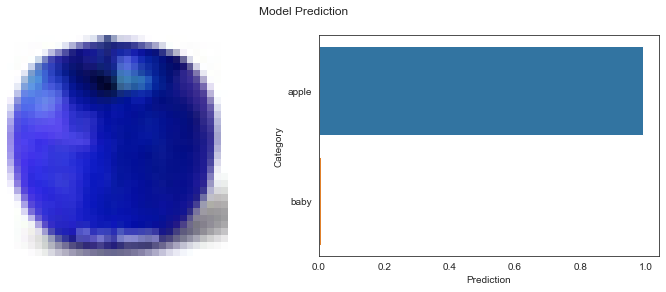

In [192]:
choix = r'data/cifar-100-test/test/apple/0005.png'
predict_image(model8, choix)